### 1.ANALYSE DE DONNÉES 

1.Chargement des Données

In [4]:
#Chargeons les données
data<-read.csv("housing_data.csv")

#Inspectons les premiris lignes
head(data)


,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
,<dbl>,<dbl>,<int>,<int>,<dbl>
1,NA,5.585324,10,3,47.90077
2,2.654339,5.395206,3,6,41.53910
3,4.619221,6.033965,9,4,48.51757
4,6.807575,5.418335,10,5,42.50757
5,2.414617,6.189320,2,4,51.39125
6,2.414658,5.964833,6,4,49.64657


In [12]:
tail(data)

,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
,<dbl>,<dbl>,<int>,<int>,<dbl>
501,5.315444,6.626635,9,4,51.99554
502,NA,6.444620,4,6,53.57924
503,0.100000,6.734687,4,3,49.65183
504,4.407423,5.625335,2,1,43.67766
505,1.373394,6.922176,6,3,50.66238
506,1.782187,6.138320,2,4,45.43800


In [5]:
#Vérifier la structure des données 
str(data)


'data.frame':	506 obs. of  5 variables:
 $ Crime.Rate             : num  NA 2.65 4.62 6.81 2.41 ...
 $ Average.Rooms          : num  5.59 5.4 6.03 5.42 6.19 ...
 $ Public.Transport.Access: int  10 3 9 10 2 6 7 9 3 10 ...
 $ Number.of.Schools      : int  3 6 4 5 4 4 4 4 6 4 ...
 $ Median.Home.Value      : num  47.9 41.5 48.5 42.5 51.4 ...


In [6]:
#Résumé des données 
summary(data)

   Crime.Rate        Average.Rooms   Public.Transport.Access Number.of.Schools
 Min.   : 0.005305   Min.   :4.112   Min.   : 1.000          Min.   : 0.000   
 1st Qu.: 1.299938   1st Qu.:5.598   1st Qu.: 3.000          1st Qu.: 4.000   
 Median : 3.031481   Median :6.033   Median : 5.000          Median : 5.000   
 Mean   : 3.137415   Mean   :6.026   Mean   : 5.421          Mean   : 4.992   
 3rd Qu.: 4.584798   3rd Qu.:6.460   3rd Qu.: 8.000          3rd Qu.: 6.000   
 Max.   :12.631829   Max.   :7.801   Max.   :10.000          Max.   :10.000   
 NA's   :25          NA's   :15                                               
 Median.Home.Value
 Min.   :31.55    
 1st Qu.:43.23    
 Median :46.91    
 Mean   :47.10    
 3rd Qu.:50.85    
 Max.   :62.56    
                  

In [14]:
# Créons une fonction pour calculer le mode

mode_function<-function(v){
    uniq<-unique(v)
    uniq[which.max(tabulate(match(v,uniq)))]
}

In [17]:
#Calculons et affichons les statistiques descriptives

stats <- data %>%
  summarise(across(everything(), list(mean = ~mean(. , na.rm = TRUE), 
                                       median = ~median(. , na.rm = TRUE), 
                                       mode = ~mode_function(.))))

In [18]:
print(stats)

  Crime.Rate_mean Crime.Rate_median Crime.Rate_mode Average.Rooms_mean
1        3.137415          3.031481             0.1           6.025737
  Average.Rooms_median Average.Rooms_mode Public.Transport.Access_mean
1             6.033179                 NA                     5.420949
  Public.Transport.Access_median Public.Transport.Access_mode
1                              5                            2
  Number.of.Schools_mean Number.of.Schools_median Number.of.Schools_mode
1               4.992095                        5                      5
  Median.Home.Value_mean Median.Home.Value_median Median.Home.Value_mode
1               47.10356                 46.91257               47.90077


In [21]:
#Calculons la corrélation 
cor_matrix<-cor(data,use="complete.obs")

#Affichons la matrix de correlation
print(cor_matrix)

#Identifions la paire des variables avec la correlation la plus élevée 
high_corr <- which(abs(cor_matrix) == max(abs(cor_matrix[upper.tri(cor_matrix)])), arr.ind = TRUE)
print(high_corr)

                        Crime.Rate Average.Rooms Public.Transport.Access
Crime.Rate              1.00000000   0.109411375             0.014246404
Average.Rooms           0.10941138   1.000000000            -0.003768297
Public.Transport.Access 0.01424640  -0.003768297             1.000000000
Number.of.Schools       0.02442190   0.005000546             0.035876982
Median.Home.Value       0.09161033   0.888351070             0.010709022
                        Number.of.Schools Median.Home.Value
Crime.Rate                    0.024421905       0.091610332
Average.Rooms                 0.005000546       0.888351070
Public.Transport.Access       0.035876982       0.010709022
Number.of.Schools             1.000000000       0.004667281
Median.Home.Value             0.004667281       1.000000000
                  row col
Median.Home.Value   5   2
Average.Rooms       2   5


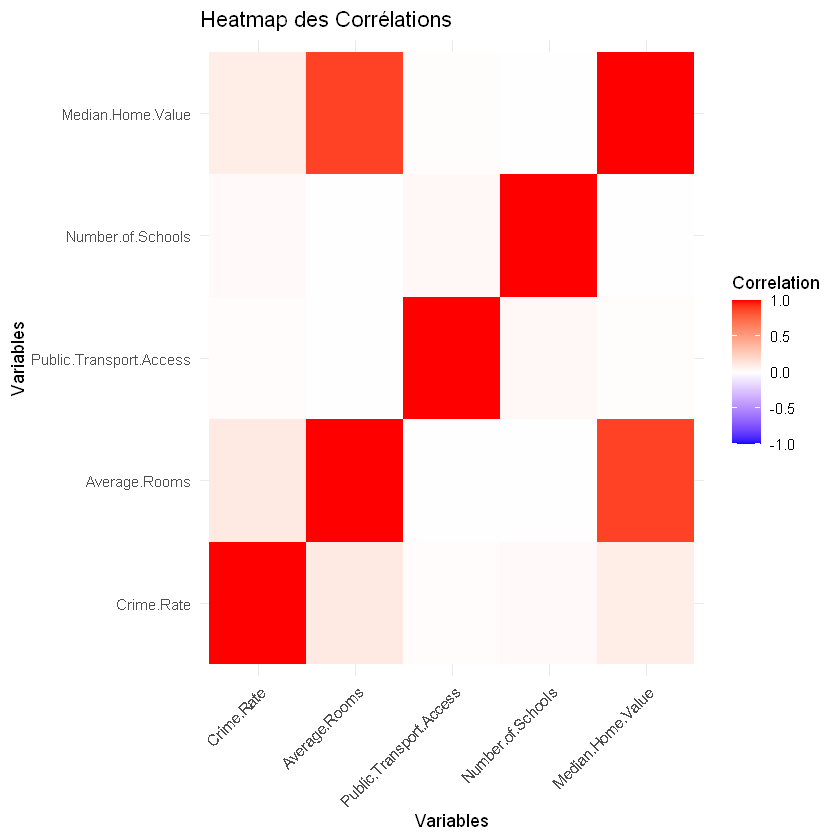

In [25]:
# Transformons la matrice de corrélation pour ggplot
cor_melted <- melt(cor_matrix)

# Créons une heatmap
ggplot(data = cor_melted, aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       limit = c(-1, 1), name="Correlation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Heatmap des Corrélations", x = "Variables", y = "Variables")

In [26]:
# Vérifier les valeurs manquantes
missing_values <- colSums(is.na(data))
print(missing_values)



             Crime.Rate           Average.Rooms Public.Transport.Access 
                     25                      15                       0 
      Number.of.Schools       Median.Home.Value 
                      0                       0 


In [27]:
#Imputation des valeurs manquantes avec la médiane 

data <- data %>%
  mutate(across(everything(), ~ifelse(is.na(.), median(., na.rm = TRUE), .)))



In [28]:
# Vérifions à nouveau les valeurs manquantes
missing_values_after <- colSums(is.na(data))
print(missing_values_after)

             Crime.Rate           Average.Rooms Public.Transport.Access 
                      0                       0                       0 
      Number.of.Schools       Median.Home.Value 
                      0                       0 


Warning message:
"package 'naniar' was built under R version 4.4.2"


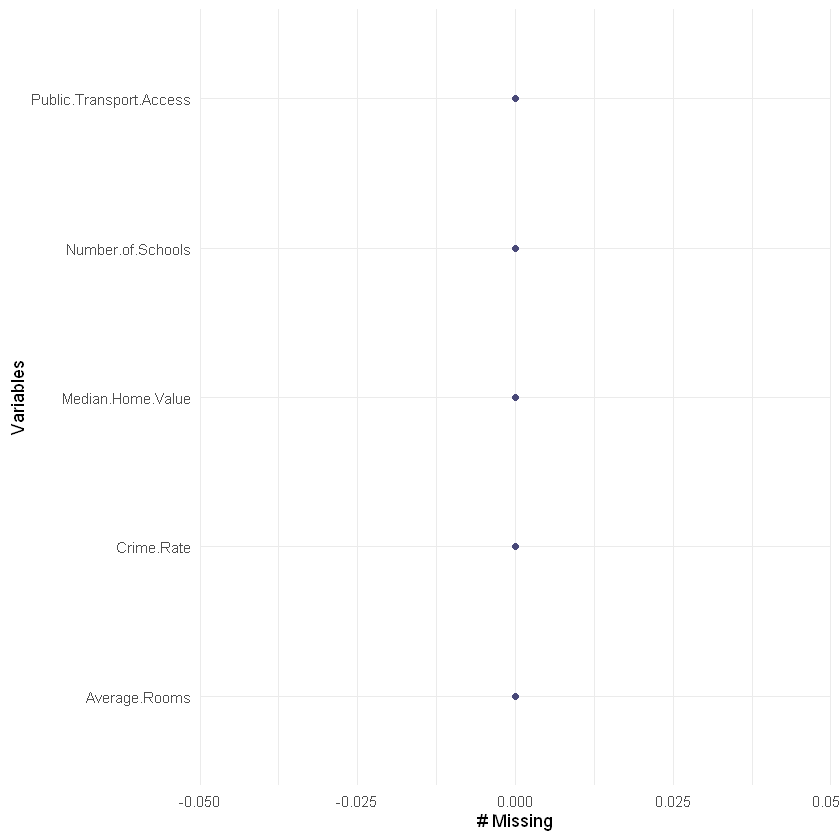

In [32]:
#Visualisons les valeurs manquantes
#install.packages("naniar")
library(naniar)

gg_miss_var(data)

6. Gestion des Données aberrants 

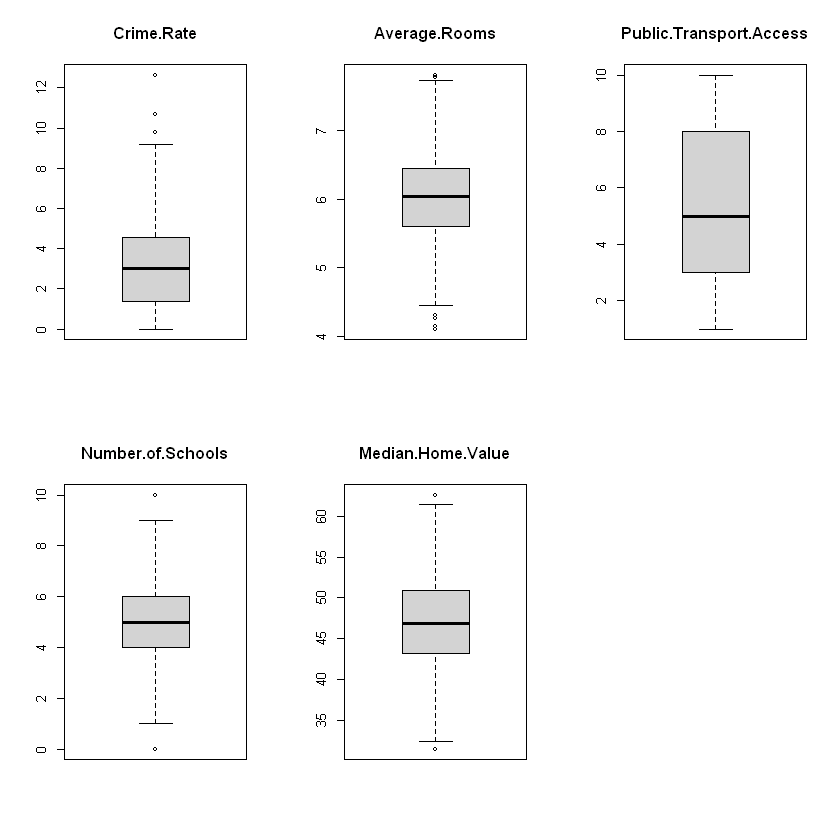

In [41]:
#Données aberrantes

# Visualisons la distribution de chaque variable avec des boîtes à moustaches
par(mfrow = c(2, 3)) # Divisons la fenêtre en 2 lignes et 3 colonnes
for (col in names(data)) {
  boxplot(data[[col]], main = col)
}
par(mfrow = c(1, 1)) # Revenons à un seul graphique par fenêtre

In [44]:

# Calculons le pourcentage de valeurs aberrantes pour chaque variable
for (col in names(data)) {
  # Calculer l'écart interquartile (IQR)
  iqr <- IQR(data[[col]])
  
  # Définissons les seuils pour les valeurs aberrantes
  lower_bound <- quantile(data[[col]], 0.25) - 1.5 * iqr
  upper_bound <- quantile(data[[col]], 0.75) + 1.5 * iqr
  
  # Identifions les valeurs aberrantes
  outliers <- data[[col]] < lower_bound | data[[col]] > upper_bound
  
  # Calculons le pourcentage de valeurs aberrantes
  outlier_pct <- round(100 * sum(outliers) / nrow(data), 2)
  
  # Affichons les résultats
  print(paste0("Pourcentage de valeurs aberrantes pour ", col, ": ", outlier_pct, "%"))
}

[1] "Pourcentage de valeurs aberrantes pour Crime.Rate: 0.59%"
[1] "Pourcentage de valeurs aberrantes pour Average.Rooms: 1.38%"
[1] "Pourcentage de valeurs aberrantes pour Public.Transport.Access: 0%"
[1] "Pourcentage de valeurs aberrantes pour Number.of.Schools: 2.57%"
[1] "Pourcentage de valeurs aberrantes pour Median.Home.Value: 0.4%"


In [45]:
#Remplacons les valeurs aberrantes par la médiane de la variable
median_value <- median(data$Number.of.Schools, na.rm = TRUE)
data$Number.of.Schools[data$Number.of.Schools < lower_bound | data$Number.of.Schools > upper_bound] <- median_value

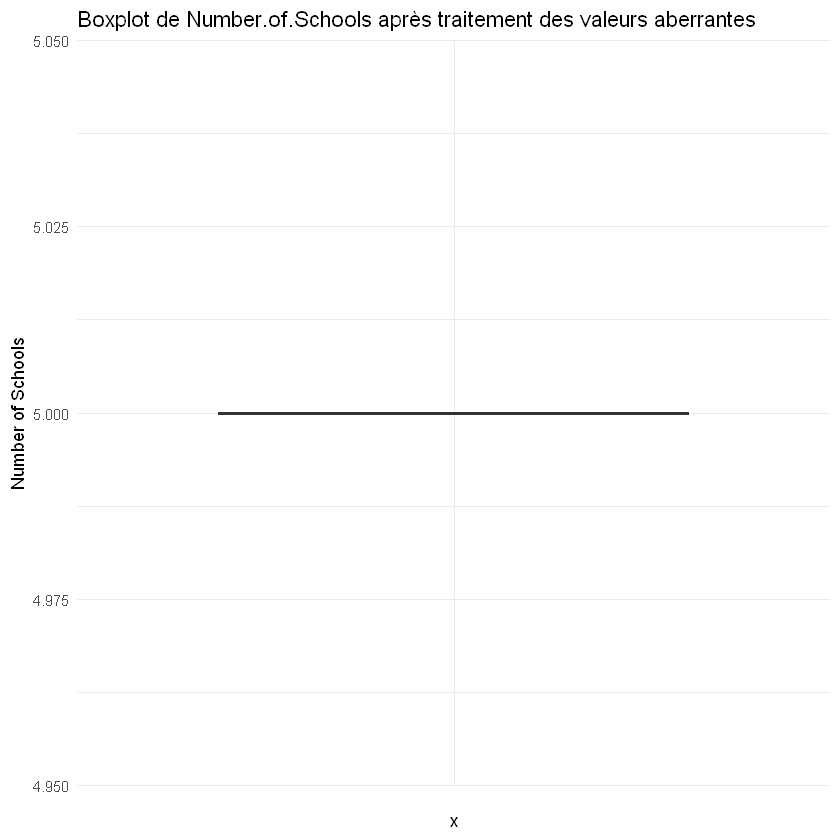

In [46]:

# Créer un boxplot pour chaque variable afin de visualiser les valeurs aberrantes
ggplot(data, aes(x = "", y = Number.of.Schools)) +
  geom_boxplot(fill = "lightblue", outlier.colour = "red") +
  labs(title = "Boxplot de Number.of.Schools après traitement des valeurs aberrantes",
       y = "Number of Schools") +
  theme_minimal()

7. Gestion des doublons

In [47]:
# Vérifier s'il y a des doublons
duplicates <- data[duplicated(data) | duplicated(data, fromLast = TRUE), ]

# Afficher les doublons éventuels
if (nrow(duplicates) > 0) {
  print("Voici les doublons détectés :")
  print(duplicates)
} else {
  print("Il n'y a pas de doublons dans le jeu de données.")
}

[1] "Il n'y a pas de doublons dans le jeu de données."


### 2.Visualisation des Données

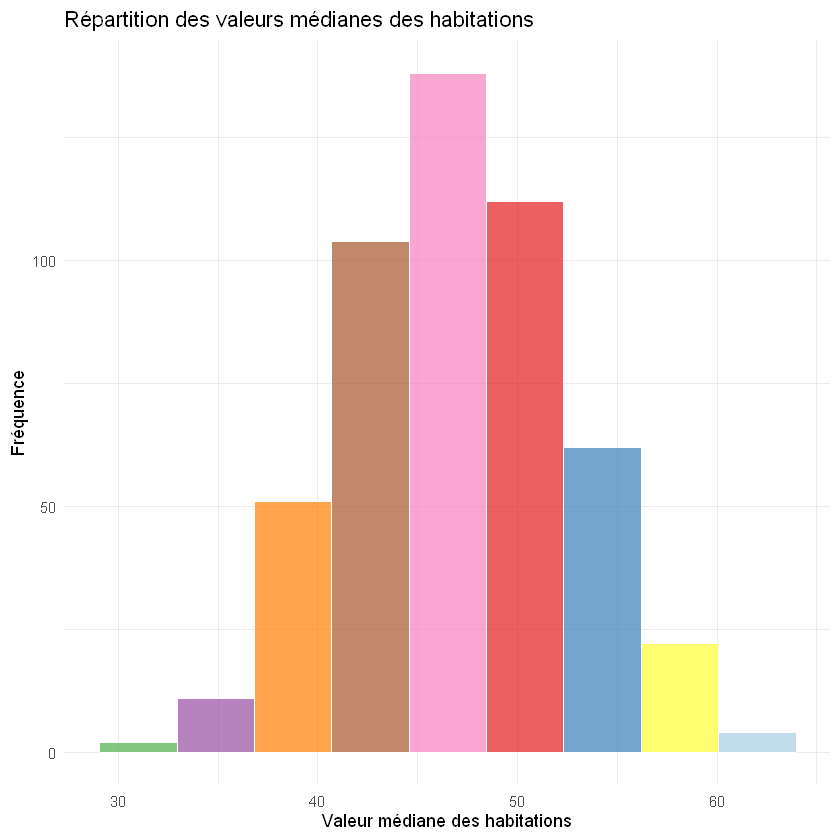

In [48]:

# Définissons une palette de couleurs
my_colors <- c("#4daf4a", "#984ea3", "#ff7f00", "#a65628", "#f781bf", 
               "#e41a1c", "#377eb8", "#ffff33", "#a6cee3")

# Créons l'histogramme 
ggplot(data, aes(x = Median.Home.Value)) +
  geom_histogram(bins = 9, fill = my_colors, color = "white", alpha = 0.7) +
  labs(title = "Répartition des valeurs médianes des habitations",
       x = "Valeur médiane des habitations", 
       y = "Fréquence") +
  theme_minimal()

### 3.Test d'Hypothèse

1.Définir les taux de criminalité "élevés" et "bas"

In [50]:
#Utilisons la mediane de la variable "Crime.Rate"

#Calculons la mediane du taux de criminalité 
crime_rate_median<-median(data$Crime.Rate)

#Creons une nouvelle variable"Crime.Category"
data$Crime.Category <- ifelse(data$Crime.Rate >= crime_rate_median, "Élevé", "Bas")

2.Vérifier les hypothèses du test t

In [51]:
#tiliser le test de Shapiro-Wilk pour vérifier si les distributions de "Median.Home.Value" sont normales dans chaque groupe de taux de criminalité.
# Vérifions la normalité pour le groupe "Élevé"
shapiro.test(data$Median.Home.Value[data$Crime.Category == "Élevé"])

# Vérifions la normalité pour le groupe "Bas" 
shapiro.test(data$Median.Home.Value[data$Crime.Category == "Bas"])


	Shapiro-Wilk normality test

data:  data$Median.Home.Value[data$Crime.Category == "Élevé"]
W = 0.99612, p-value = 0.7564



	Shapiro-Wilk normality test

data:  data$Median.Home.Value[data$Crime.Category == "Bas"]
W = 0.99583, p-value = 0.7674


In [61]:
#Vérifions l'homogénéité de la variance
#Utiliserons le test de Levene pour vérifier l'égalité des variances entre les deux groupes.

library(car)

# Effectuons le test de Levene
levene_test <- leveneTest(Median.Home.Value ~ Crime.Category, data = data)
print(levene_test)

Warning message:
"package 'car' was built under R version 4.4.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.4.2"

Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  2.6073  0.107
      504               


3.Effectuer le test t


In [62]:
# Effectuons le test t
t_test_result <- t.test(Median.Home.Value ~ Crime.Category, data = data, var.equal = TRUE)

# Affichons les résultats
print(t_test_result)


	Two Sample t-test

data:  Median.Home.Value by Crime.Category
t = -0.84537, df = 504, p-value = 0.3983
alternative hypothesis: true difference in means between group Bas and group Élevé is not equal to 0
95 percent confidence interval:
 -1.3736857  0.5471743
sample estimates:
  mean in group Bas mean in group Élevé 
           46.88631            47.29957 



### 4.Modèle de Régression Linéaire

 1 : Créer le Modèle de Régression Linéaire

In [66]:
modele <- lm(Median.Home.Value ~ Average.Rooms, data = data)

# Affichons les résultats du modèle
summary(modele)


Call:
lm(formula = Median.Home.Value ~ Average.Rooms, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6212 -1.6873  0.0096  1.7347 13.9495 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.7854     1.0944   3.459 0.000588 ***
Average.Rooms   7.1886     0.1805  39.823  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.698 on 504 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7584 
F-statistic:  1586 on 1 and 504 DF,  p-value: < 2.2e-16


2 : Créer le Nuage de Points de Régression

`geom_smooth()` using formula = 'y ~ x'


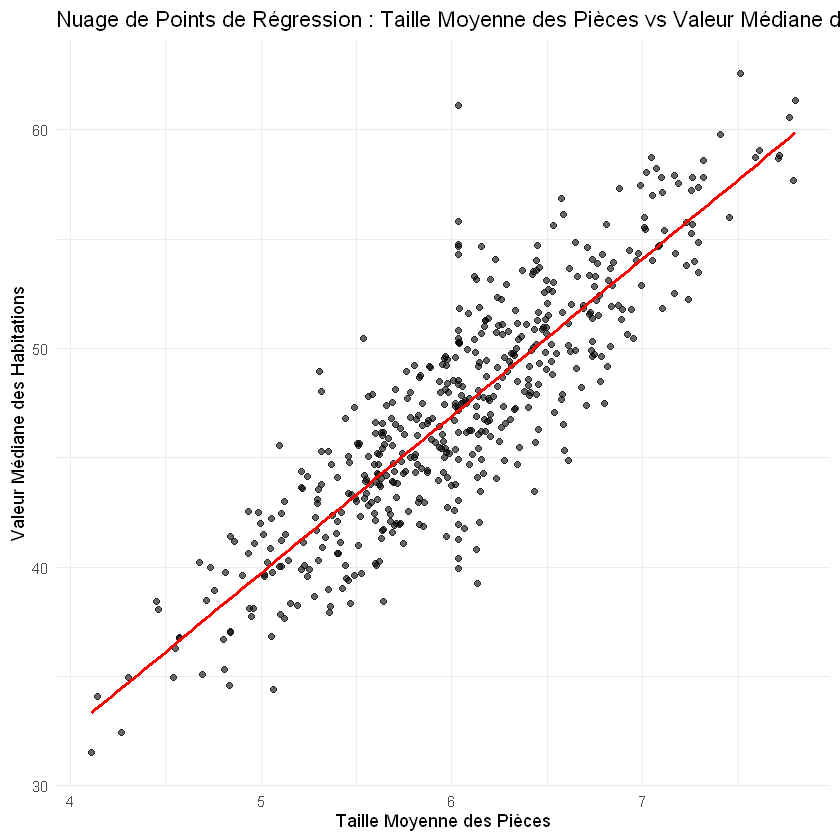

In [69]:

# Créons le graphique de dispersion avec la ligne de régression
ggplot(data, aes(x = Average.Rooms, y = Median.Home.Value)) +
  geom_point(alpha = 0.6) +  # Ajoutons les points de dispersion
  geom_smooth(method = "lm", col = "red", se = FALSE) +  # Ajouter la ligne de régression
  labs(title = "Nuage de Points de Régression : Taille Moyenne des Pièces vs Valeur Médiane des Habitations",
       x = "Taille Moyenne des Pièces",
       y = "Valeur Médiane des Habitations") +  # Ajoutons les labels
  theme_minimal()  # Appliquons un thème minimaliste